#### Quiz 2 Problem 1 
Authored: Austin Jetrin Maddison 6481268

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from my_settings import *
import pandas as pd

In [2]:
def coin_tosses(tosses=2):
    
    p_h = 0.75
    p_t = 1 - p_h
    x = np.random.ranf(tosses)
    heads = np.sum( x < p_h)
     
    return heads

In [3]:
f = np.vectorize(lambda x : coin_tosses())
res = f(np.zeros(10_000, dtype=np.int8))

In [4]:
res

array([1, 2, 1, ..., 2, 2, 1])

In [5]:
print(f'Mean = {res.mean()}')
print(f'Var = {res.var()}')
print(f'Std = {res.std()}')

Mean = 1.5064
Var = 0.36895904000000007
Var = 0.6074199865002797


(array([ 625.,    0.,    0.,    0.,    0., 3719.,    0.,    0.,    0.,
        5656.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

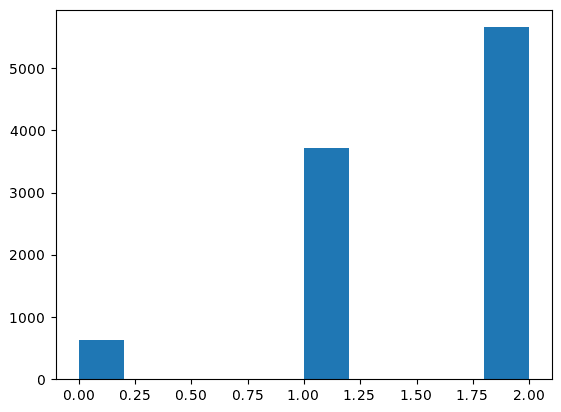

In [66]:
plt.hist(res)

In [21]:
calc_x_bar = np.vectorize(lambda x : f(np.zeros(25, dtype=np.int8)).mean())

In [25]:
x_bars = calc_x_bar(np.zeros(10_000))
x_bars

array([1.44, 1.44, 1.4 , ..., 1.52, 1.52, 1.56])

In [35]:
np.random.seed(27)
print(f'Mean = {x_bars.mean()}')
print(f'Var = {x_bars.var()}')
print(f'Std = {x_bars.std()}')

Mean = 1.499932
Var = 0.015156795376000003
Std = 0.12311293748424657


(array([2.17391304e-03, 3.15217391e-02, 1.40217391e-01, 9.13043478e-01,
        1.64239130e+00, 2.53478261e+00, 3.85652174e+00, 1.27391304e+00,
        3.91304348e-01, 8.36956522e-02]),
 array([0.96 , 1.052, 1.144, 1.236, 1.328, 1.42 , 1.512, 1.604, 1.696,
        1.788, 1.88 ]),
 <BarContainer object of 10 artists>)

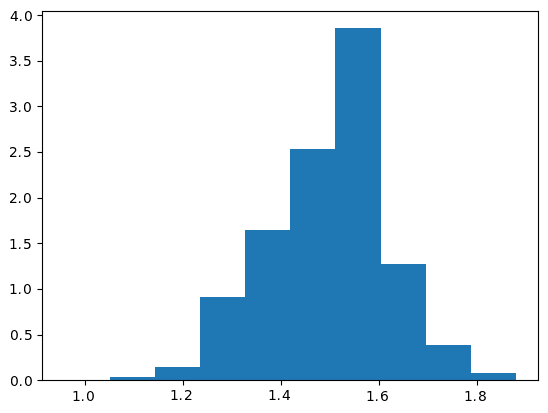

In [29]:
plt.hist(x_bars, density=True)

2

In [84]:
n = 200
m = 200

ns = np.arange(1, n+1)
ms = np.arange(1, m+1)

In [163]:
N, M = np.meshgrid(ns, ms)
table = N * M

leading_num = np.vectorize(lambda x: int(str(x)[0]))

res: np.ndarray = leading_num(table.flatten())
res = res.astype(np.uint32)
res

array([1, 2, 3, ..., 3, 3, 4], dtype=uint32)

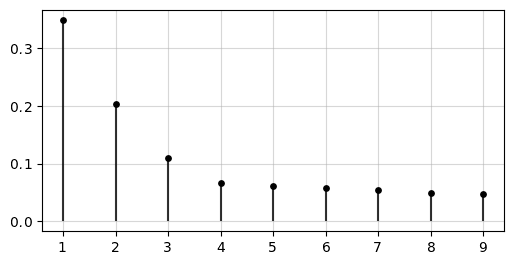

In [184]:
hist, edge = np.histogram(res, density=True, bins=np.arange(0, 11, 1))

plt.figure(figsize=(5, 2.5))
plt.scatter(edge[1:-1], hist[1:], s=15, color="k", marker='o', zorder=4)
plt.vlines(edge[1:-1], ymax=hist[1:], ymin=np.zeros(hist.size-1), color='k', alpha=0.8)

plt.tight_layout(pad=0.2)
plt.grid(alpha=0.5)


3


In [15]:
sim_expo = np.vectorize(lambda lmd : (-1/lmd) * np.log(1 - np.random.ranf()))

In [69]:
sim_res = sim_expo(np.ones(100_000))
sim_res

array([3.87544203, 3.01562567, 0.04717542, ..., 0.83904715, 0.2615383 ,
       0.65992735])

(array([5.54768274e-01, 1.49316057e-01, 3.96745210e-02, 1.09444339e-02,
        2.66974410e-03, 7.43281029e-04, 2.42704009e-04, 8.34295032e-05,
        0.00000000e+00, 7.58450029e-06]),
 array([5.19416440e-06, 1.31848362e+00, 2.63696204e+00, 3.95544047e+00,
        5.27391889e+00, 6.59239732e+00, 7.91087574e+00, 9.22935417e+00,
        1.05478326e+01, 1.18663110e+01, 1.31847894e+01]),
 <BarContainer object of 10 artists>)

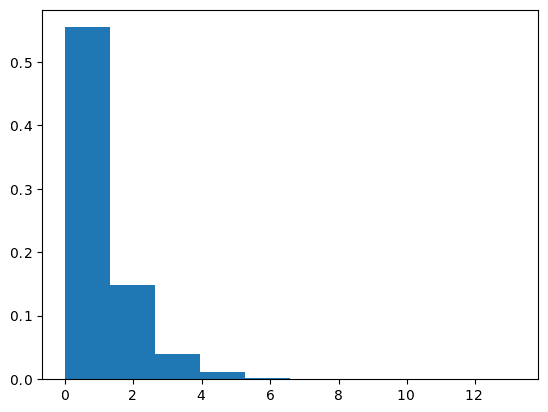

In [71]:
plt.hist(sim_res, density=True)

In [20]:
expo = lambda lmd: np.e**-lmd

In [72]:
func_res = expo(np.arange(0, 100))
func_res = func_res/np.sum(func_res)


(0.0, 10.0)

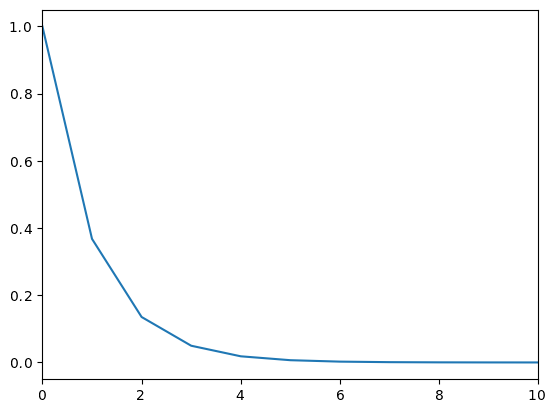

In [66]:
plt.plot(func_res)
plt.xlim((0, 10))

In [67]:
hist, edge = np.histogram(sim_res, density=True)

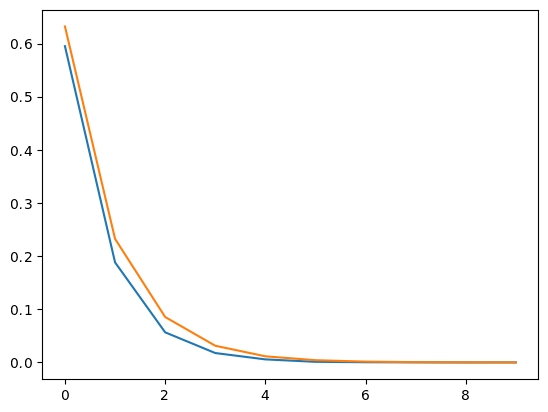

In [81]:
df = pd.DataFrame({'sim':hist, 'func':func_res[:hist.size]})
df

plt.plot(df)

b

In [96]:
N = 100_000
sim_expo = np.vectorize(lambda lmd: (-1 / lmd) * np.log(1 - np.random.ranf()))
X1 = sim_expo(np.ones(N))
X2 = sim_expo(np.ones(N)*2)
X3 = sim_expo(np.ones(N)*3)

pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

,X1,X2,X3
0,0.610757,0.064954,0.069423
1,0.901369,0.100645,0.210274
2,0.836622,0.699095,0.185436
3,0.705300,0.433874,0.282094
4,0.079316,0.449268,0.041290
...,...,...,...
99995,0.633843,0.615076,0.780071
99996,0.777920,0.848181,0.069264
99997,0.358550,0.229295,1.150923
99998,0.319949,0.171721,0.296807


In [106]:
f = np.vectorize(lambda a, c, d: min(min(a, c), d))
mins = f(X1, X2, X3) 
prob_x1_is_min = (mins == X1).mean()
prob_x1_is_min

0.16721

In [105]:
f = np.vectorize(lambda a, c, d: max(max(a, c), d))
maxs = f(X1, X2, X3) 
prob_x1_is_max = (maxs == X1).mean()
prob_x1_is_max

0.58315